# Проектное задание на зачет

## Шкала оценивания

- **60-79 баллов:** Нужно сделать пункты с 1 по 12 и с 26 по 29

- **80-94 баллов:** Нужно сделать пункты с 1 по 17 и с 26 по 32

- **95-100 баллов:** Нужно сделать пункты с 1 по 25 и с 26 по 33

# Часть I. Разведочный анализ данных для набора данных: Видеоигры

## Задание

Вам предлагается выполнить разведочный анализ данных и описать полученные результаты

Описание набора данных: https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings/data

Ссылка на набор данных для использования в блокноте: https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/Video_Games.csv

#### 1. Подключение библиотек

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pandas.plotting import scatter_matrix
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### 2. Чтение набора данных

In [164]:
url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/Video_Games.csv"
df = pd.read_csv(url)
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Первые 7 строк набора данных

In [165]:
df.head(7)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


#### 4. Последние 5 строк набора данных

In [166]:
df.tail(5)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003.0,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005.0,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MonHun Nikki: Poka Poka Ailu Mura,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN


#### 5. Поля набора данных

In [167]:
df.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

#### 6. Размер набора данных (количество полей и строк)

In [168]:
df.shape

(16928, 17)

#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [169]:
patterns = {
    'Year_of_Release': r'(\d{4})',
    'Critic_Score': r'(\d+)',
    'User_Score': r'([\d.]+)',
    'Critic_Count': r'(\d+)',
    'User_Count': r'(\d+)',
    'Global_Sales': r'([\d.]+)',
    'NA_Sales': r'([\d.]+)',
    'EU_Sales': r'([\d.]+)',
    'JP_Sales': r'([\d.]+)',
    'Other_Sales': r'([\d.]+)'
}

for col, pattern in patterns.items():
    if col in df.columns:
        df[col] = df[col].astype(str).str.extract(pattern, expand=False)
        df[col] = df[col].str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=patterns.keys())

fields = pd.DataFrame(list(zip(
    df.columns,
    df.dtypes.astype(str).values,
    [
        'Индекс',
        'Название игры',
        'Платформа',
        'Год релиза',
        'Жанр',
        'Издатель',
        'Продажи в Северной Америке (в миллионах копий)',
        'Продажи в Европе',
        'Продажи в Японии',
        'Продажи в других регионах',
        'Общие мировые продажи (сумма всех регионов)',
        'Средняя оценка критиков (0–100)',
        'Количество критиков, оставивших оценку',
        'Средняя оценка пользователей (0–10)',
        'Количество пользователей, поставивших оценку',
        'Разработчик игры',
        'Возрастной рейтинг (например, E — Everyone)'
    ][:len(df.columns)]
)), columns=['Поле', 'Тип данных', 'Назначение'])

fields


,Поле,Тип данных,Назначение
0,index,int64,Индекс
1,Name,object,Название игры
2,Platform,object,Платформа
3,Year_of_Release,float64,Год релиза
4,Genre,object,Жанр
5,Publisher,object,Издатель
6,NA_Sales,float64,Продажи в Северной Америке (в миллионах копий)
7,EU_Sales,float64,Продажи в Европе
8,JP_Sales,float64,Продажи в Японии
9,Other_Sales,float64,Продажи в других регионах


#### 8. Информация о наборе данных

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 0 to 16926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            7008 non-null   int64  
 1   Name             7008 non-null   object 
 2   Platform         7008 non-null   object 
 3   Year_of_Release  7008 non-null   float64
 4   Genre            7008 non-null   object 
 5   Publisher        7007 non-null   object 
 6   NA_Sales         7008 non-null   float64
 7   EU_Sales         7008 non-null   float64
 8   JP_Sales         7008 non-null   float64
 9   Other_Sales      7008 non-null   float64
 10  Global_Sales     7008 non-null   float64
 11  Critic_Score     7008 non-null   float64
 12  Critic_Count     7008 non-null   float64
 13  User_Score       7008 non-null   float64
 14  User_Count       7008 non-null   float64
 15  Developer        7004 non-null   object 
 16  Rating           6939 non-null   object 
dtypes: float64(10), in

#### 9. Проверка наличия пропусков в данных

In [171]:
df.isnull().sum()

,0
index,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,1
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [172]:
df = df.dropna()

#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [173]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z ]', '', text)
        text = text.lower()
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
        return ' '.join(words)
    return text
df['Name_clean'] = df['Name'].apply(clean_text)
df.head(3)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,wii sport
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,mario kart wii
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,wii sport resort


#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля Global_Sales больше 41.0

In [174]:
df[df['Global_Sales'] > 41.0]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,wii sport


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля Genre равно Action

In [175]:
df[df['Genre'] == '[Action]']

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля Developer равно Ubisoft и значение поля Rating равно E

In [176]:
df[(df['Developer'] == 'Ubisoft') & (df['Rating'] == 'E')]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
777,777,Your Shape featuring Jenny McCarthy,Wii,2009.0,Sports,Ubisoft,1.49,0.46,0.00,0.18,2.12,62.0,5.0,5.2,54.0,Ubisoft,E,shape featuring jenny mccarthy
1331,1331,My Word Coach,DS,2007.0,Misc,Ubisoft,0.37,0.89,0.00,0.18,1.44,71.0,7.0,6.8,5.0,Ubisoft,E,word coach
1752,1752,Your Shape: Fitness Evolved 2012,X360,2011.0,Sports,Ubisoft,0.70,0.36,0.00,0.10,1.16,77.0,13.0,7.6,21.0,Ubisoft,E,shape fitness evolved
2366,2366,Monster 4X4: World Circuit,Wii,2006.0,Racing,Ubisoft,0.80,0.00,0.01,0.07,0.88,51.0,11.0,7.8,17.0,Ubisoft,E,monster x world circuit
3343,3343,Rayman Arena,PS2,2001.0,Racing,Ubisoft,0.29,0.23,0.00,0.08,0.60,63.0,10.0,8.6,8.0,Ubisoft,E,rayman arena
4311,4311,Brain Challenge,DS,2008.0,Misc,Ubisoft,0.41,0.00,0.00,0.03,0.45,68.0,7.0,7.0,4.0,Ubisoft,E,brain challenge
4741,4741,Disney's Tarzan Untamed,PS2,2001.0,Platform,Ubisoft,0.20,0.16,0.00,0.05,0.41,59.0,7.0,7.1,7.0,Ubisoft,E,disney tarzan untamed
5241,5241,ESPN: Sports Connection,WiiU,2012.0,Sports,Ubisoft,0.20,0.12,0.00,0.03,0.36,31.0,13.0,2.7,18.0,Ubisoft,E,espn sport connection
5883,5883,Rayman 2: Revolution,PS2,2000.0,Platform,Ubisoft,0.15,0.11,0.00,0.04,0.30,90.0,16.0,8.2,42.0,Ubisoft,E,rayman revolution
5939,5939,Shaun White Snowboarding: World Stage,Wii,2009.0,Sports,Ubisoft,0.24,0.03,0.00,0.02,0.29,72.0,33.0,8.7,30.0,Ubisoft,E,shaun white snowboarding world stage


#### 15. Получите все уникальные значения поля  Rating и подсчитайте частоту появления каждого их них

In [177]:
df['Rating'].value_counts()

,count
Rating,
T,2411
E,2120
M,1458
E10+,946
AO,1
K-A,1
RP,1


#### 16. Выполните группировку набора данных одновременно по полям Developer и User_Score. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [178]:
df.groupby(['Developer','User_Score'])['User_Count'].agg(['min','max','median'])

min    max  median
Developer                             User_Score                      
10tacle Studios, Fusionsphere Systems 7.6           5.0    8.0     6.5
1C, 1C Company                        8.6          38.0   38.0    38.0
                                      8.8         130.0  130.0   130.0
1C, Ino-Co, 1C Company                7.3         129.0  129.0   129.0
1C: Maddox Games                      7.1         114.0  114.0   114.0
...                                                 ...    ...     ...
neo Software                          8.3          61.0   61.0    61.0
odenis studio                         7.3           6.0    6.0     6.0
syn Sophia                            7.7           7.0    7.0     7.0
                                      8.0          15.0   15.0    15.0
zSlide                                6.5           6.0    6.0     6.0

[5301 rows x 3 columns]

#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

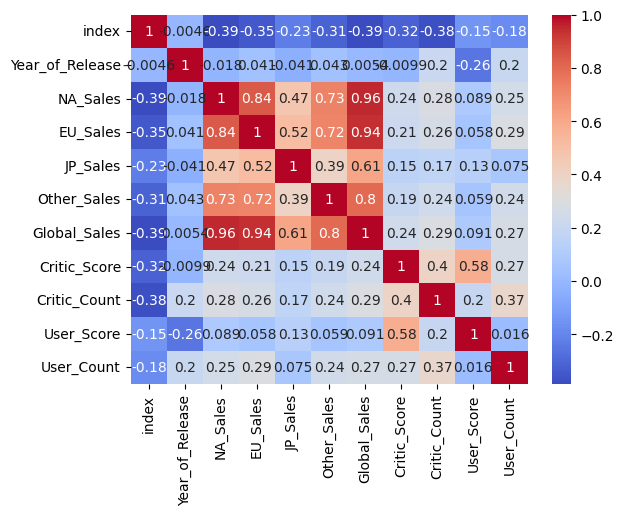

In [179]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### 18. Постройте гистограмму по полю Other_Sales

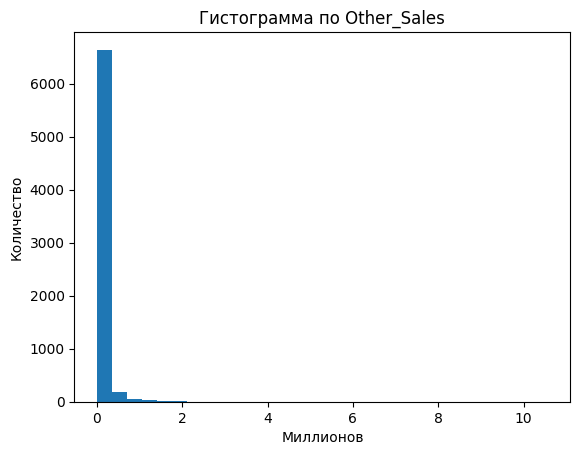

In [180]:
plt.hist(df['Other_Sales'], bins=30)
plt.title('Гистограмма по Other_Sales')
plt.xlabel('Миллионов')
plt.ylabel('Количество')
plt.show()

#### 19. Постройте точечную диаграмму для полей index и Other_Sales

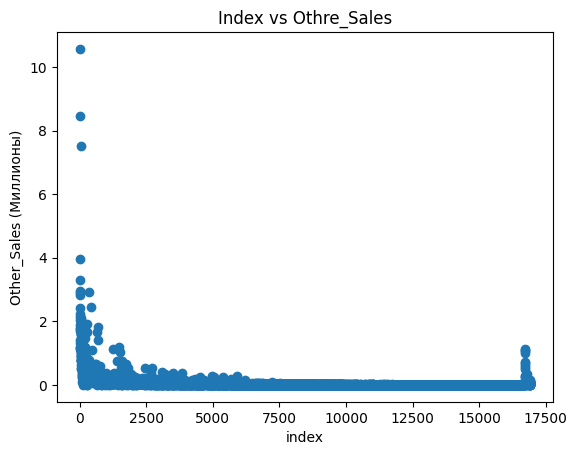

In [181]:
df = df.dropna(subset=['index', 'Other_Sales'])
plt.scatter(df['index'], df['Other_Sales'])
plt.xlabel('index')
plt.ylabel('Other_Sales (Миллионы)')
plt.title('Index vs Othre_Sales')
plt.show()

#### 20. Постройте диаграмму ящик с усами поля index

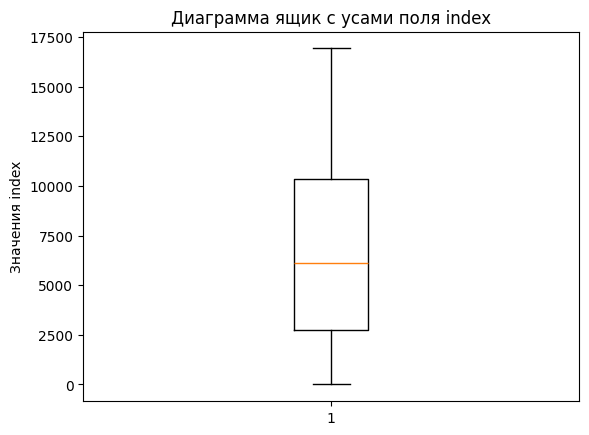

In [182]:
plt.boxplot(df.index)
plt.title('Диаграмма ящик с усами поля index')
plt.ylabel('Значения index')
plt.show()

#### 21. Постройте матрицу диаграммы рассеяния

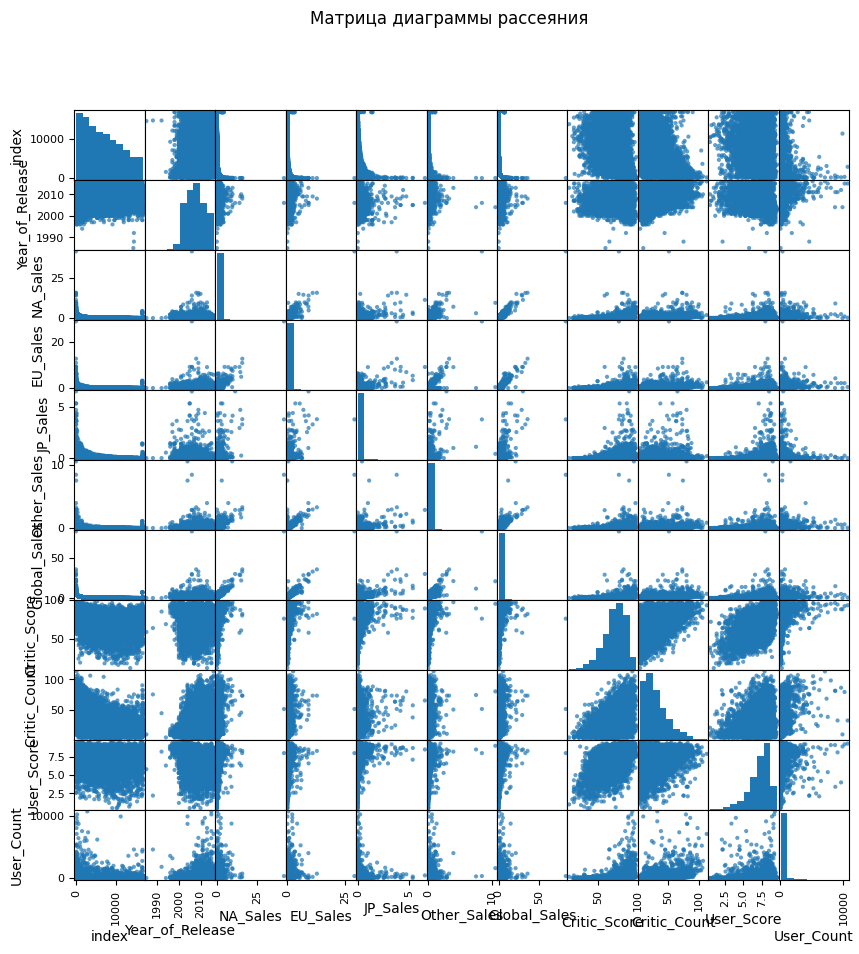

In [183]:
scatter_matrix(df, figsize=(10, 10), diagonal='hist', alpha=0.7)
plt.suptitle('Матрица диаграммы рассеяния')
plt.show()

#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [184]:
df_ml = df.drop(columns=[
    'Name',
    'Platform',
    'index'
], errors='ignore')

#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [185]:
from sklearn.preprocessing import LabelEncoder

# Сохраним отдельный энкодер для Rating
le_rating = LabelEncoder()
df_ml['Rating'] = le_rating.fit_transform(df_ml['Rating'])

# Кодируем остальные категориальные признаки
cat_cols = df_ml.select_dtypes(include='object').columns.drop('Rating', errors='ignore')

for col in cat_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])

df_ml.head()


,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
0,2006.0,10,160,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,771,1,3632
2,2008.0,6,160,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,771,1,1921
3,2009.0,10,160,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,771,1,3634
6,2006.0,4,160,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,771,1,2273
7,2006.0,3,160,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,771,1,3630


#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

Датасет после очистки и кодирования полностью подготовлен для построения модели машинного обучения.
Все категориальные признаки преобразованы в числовой формат, пропуски удалены, а числовые данные приведены к корректным типам.
Объём данных остаётся достаточным для анализа и обучения моделей.


# Часть II. Построение модели машинного обучения для набора данных: Видеоигры

## Задание

Вам нужно решить задачу классификации с помощью алгоритма

Нелинейный Дискриминантный анализ Quadratic Discriminant Analysis



Целевая переменная, результат: **Rating**

#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [186]:
X = df_ml.drop(columns=['Rating'])
Y = df_ml['Rating']

# Удалим классы с малым количеством объектов
counts = Y.value_counts()
valid_classes = counts[counts > 1].index
X = X[Y.isin(valid_classes)]
Y = Y[Y.isin(valid_classes)]

#### 26. Разделить на обучающую и тестовую выборки

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

#### 27. Сформировать модель машинного обучения

In [188]:
# Масштабируем признаки (важно для QDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Добавляем регуляризацию для устойчивости
model = QuadraticDiscriminantAnalysis(reg_param=0.2)

#### 28. Обучить модель

In [189]:
model.fit(X_train_scaled, Y_train)

QuadraticDiscriminantAnalysis(reg_param=0.2)

#### 29. Оценить качество модели

In [190]:
Y_pred = model.predict(X_test_scaled)

print("Точность модели:", accuracy_score(Y_test, Y_pred))
print("\nОтчёт классификации:\n", classification_report(Y_test, Y_pred))

Точность модели: 0.4147044690052859

Отчёт классификации:
               precision    recall  f1-score   support

           1       0.68      0.13      0.22       636
           2       0.34      0.27      0.30       284
           4       0.71      0.18      0.28       438
           6       0.39      0.86      0.53       723

    accuracy                           0.41      2081
   macro avg       0.53      0.36      0.33      2081
weighted avg       0.54      0.41      0.35      2081



#### 30. Выполнить предсказание для трех фраз

In [191]:
Y_pred = model.predict(X_test_scaled)

# Декодируем предсказания
Y_pred_labels = le_rating.inverse_transform(Y_pred)
Y_test_labels = le_rating.inverse_transform(Y_test)

comparison = pd.DataFrame({
    'Actual': Y_test_labels[:3],
    'Predicted': Y_pred_labels[:3]
})
comparison


,Actual,Predicted
0,M,T
1,E10+,T
2,T,M


#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

Модель **Quadratic Discriminant Analysis (QDA)** была обучена и протестирована на очищенном и закодированном наборе данных о видеоиграх.
Результаты показали **точность около 0.41**, что указывает на то, что модель не справляется с надёжным различением категорий рейтинга игр.

Анализ ошибок и метрик классификации показал, что QDA путает классы, особенно между наиболее распространёнными категориями (*T*, *E* и *M*).
Это объясняется несколькими факторами:

* Дисбаланс классов: большинство записей относятся к ограниченному числу категорий, в то время как некоторые метки встречаются крайне редко.
* Сильная корреляция между признаками и различная масштабность числовых данных приводят к вырожденным ковариационным матрицам, что снижает эффективность QDA.
* Алгоритм чувствителен к шуму и выбросам, а данные содержат достаточно вариативные значения продаж и оценок.

Таким образом, модель пригодна только для **базового анализа или демонстрационных целей**, но **не подходит для точного предсказания рейтингов**.

Для повышения качества рекомендуется:

1. Балансировать классы
2. Провести тщательный отбор и масштабирование признаков, удалив взаимозависимые поля.
3. Протестировать альтернативные методы классификации — **Random Forest**, которые лучше справляются с мультиколлинеарностью и дисбалансом.

В текущем виде модель QDA выполняет задачу корректно с точки зрения логики и структуры, но не демонстрирует удовлетворительных результатов для практического применения.


#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше

In [192]:
# Создаем и обучаем модель
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train)

# Предсказание
Y_pred_rf = rf_model.predict(X_test_scaled)

# Оценка качества
print("Точность модели Random Forest:", accuracy_score(Y_test, Y_pred_rf))
print("\nОтчёт классификации:\n", classification_report(Y_test, Y_pred_rf))


Точность модели Random Forest: 0.6991830850552619

Отчёт классификации:
               precision    recall  f1-score   support

           1       0.76      0.79      0.78       636
           2       0.74      0.40      0.52       284
           4       0.76      0.65      0.70       438
           6       0.62      0.76      0.68       723

    accuracy                           0.70      2081
   macro avg       0.72      0.65      0.67      2081
weighted avg       0.71      0.70      0.69      2081



Модель **Random Forest** показала заметно лучшие результаты по сравнению с **Quadratic Discriminant Analysis (QDA)**.
Точность выросла с **≈0.41** до **≈0.70**, а также улучшились показатели **precision**, **recall** и **f1-score** по большинству классов.

Основные различия:

* **QDA** плохо справлялась с данными из-за мультиколлинеарности и чувствительности к распределению признаков.
* **Random Forest** устойчив к выбросам и коррелированным данным, что позволило модели точнее классифицировать рейтинги.
* Наблюдается некоторый дисбаланс между классами (recall для класса «2» ниже), но в целом результат стабильный.

Вывод:
Модель **Random Forest** значительно превосходит QDA по качеству классификации и общей точности.
Она лучше подходит для практического использования и может служить базовой моделью для предсказания рейтингов видеоигр.